In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_listings = pd.read_csv('listings/listings.csv')
data_calender = pd.read_csv('calendar/calendar.csv')
data_reviews = pd.read_csv('reviews/reviews.csv')

In [3]:
data_listings.head()

,id,listing_url,scrape_id,last_searched,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month
0,50188,https://www.airbnb.com/rooms/50188,20230917033543,2023-09-17,2023-09-18,Villa in Ix-Xewkija · ★4.88 · 3 bedrooms · 3 b...,Xewkija is a small village found on the island...,"Felix the butcher , the bakery and the mini ma...",https://a0.muscache.com/pictures/39216710/b3fa...,45357098,...,1,0,0,MT02664,Xewkija,NaN,NaN,NaN,NaN,1.33
1,102120,https://www.airbnb.com/rooms/102120,20230917033543,2023-09-17,2023-09-18,Home in Għajnsielem · ★4.77 · 4 bedrooms · 7 b...,This holiday house has been recently converted...,The village square is just a few minutes away....,https://a0.muscache.com/pictures/prohost-api/H...,534091,...,7,0,0,MT02622,Ghajnsielem,NaN,NaN,NaN,NaN,0.28
2,109123,https://www.airbnb.com/rooms/109123,20230917033543,2023-09-17,2023-09-18,"Rental unit in Nadur, · ★4.80 · 2 bedrooms · 3...",Our place is located in a small town called Na...,I can tell were the best places are for breakf...,https://a0.muscache.com/pictures/724159/6277e4...,560039,...,3,0,0,MT02643,Nadur,NaN,NaN,NaN,NaN,0.82
3,113998,https://www.airbnb.com/rooms/113998,20230917033543,2023-09-17,2023-09-18,Rental unit in Floriana · ★4.67 · 1 bedroom · ...,Hi and welcome to Residence Rouge.<br />Our 20...,NaN,https://a0.muscache.com/pictures/744058/a7f0aa...,578865,...,7,0,0,MT01118,Floriana,NaN,NaN,NaN,NaN,1.36
4,114044,https://www.airbnb.com/rooms/114044,20230917033543,2023-09-17,2023-09-18,Condo in Ta' Xbiex · ★4.89 · 1 bedroom · 1 bed...,It is warm and cosy in winter and airy in the ...,"It is very central on the island, a stone's th...",https://a0.muscache.com/pictures/miso/Hosting-...,578994,...,0,2,0,MT01261,Ta' Xbiex,NaN,NaN,NaN,NaN,0.97


In [13]:
data_calender.head()  # listing_id is basically id in listings

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50188,2023-09-18,f,$150.00,$150.00,4,1125
1,50188,2023-09-19,f,$150.00,$150.00,4,1125
2,50188,2023-09-20,f,$150.00,$150.00,4,1125
3,50188,2023-09-21,f,$150.00,$150.00,4,1125
4,50188,2023-09-22,f,$150.00,$150.00,4,1125


In [14]:
data_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,792008407551438130,958597598094909122,2023-08-15,526505323,Liudmyla,Чудове спокійне місце. Приємний та порядний го...
1,792008407551438130,960717459341750739,2023-08-18,531120574,Imre,"A legkorrektebb, legkedvesebb, legsegítőkészeb..."
2,792008407551438130,964354679102471856,2023-08-23,467974445,Esse,Mike é un host fa fantastico. La casa é andata...
3,792008407551438130,969443923840761308,2023-08-30,458696377,Nicole,Alloggio molto pulito e ben organizzato. Propr...
4,792008407551438130,973784771155183389,2023-09-05,388122030,Amal,Mike was super responsive (even honored my ver...


In [15]:
data_listings.shape # 80 columns, 3818 rows

(9999, 80)

In [16]:
data_listings.last_scraped.unique() # only one value, so we can drop this column

array(['2023-09-18'], dtype=object)

In [17]:
data_listings.last_searched.unique() # only one real value (some are nan), so we can drop this column

array(['2023-09-17', nan], dtype=object)

In [18]:
for i in data_listings.columns:
    if len(data_listings[i].unique()) in (1, 2):
        print(i, data_listings[i].unique())

scrape_id [20230917033543]
last_searched ['2023-09-17' nan]
last_scraped ['2023-09-18']
host_has_profile_pic ['t' 'f']
host_identity_verified ['t' 'f']
bathrooms [nan]
calendar_updated [nan]
has_availability ['t' 'f']
calendar_last_scraped ['2023-09-18']
requires_license [nan]
license [nan]
instant_bookable ['f' 't']
region_parent_id [nan]
region_parent_name [nan]
region_parent_parent_id [nan]
region_parent_parent_name [nan]


Removing the columns which are not much of use to use

In [19]:
listings = data_listings.drop(["last_scraped", "last_searched", "bathrooms", "calendar_updated", "calendar_last_scraped",
                    "requires_license", "license", "region_parent_id", "region_parent_name", "region_parent_parent_id",
                    "region_parent_parent_name"], axis=1)

In [20]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
   

These are the cities

In [21]:
listings.region_name.unique()

array(['Xewkija', 'Ghajnsielem', 'Nadur', 'Floriana', "Ta' Xbiex",
       'San Giljan', 'Zebbug (Ghawdex)', 'San Pawl il-Bahar', 'Msida',
       'Sliema', 'Siggiewi', 'Rabat (Malta)', 'Gzira', 'Qala', 'Mellieha',
       'San Gwann', 'Tarxien', 'Valletta', 'Birgu', 'Swieqi',
       'Marsascala', 'Ghasri', 'Pieta', 'Mdina', 'Attard', 'Qormi',
       'Gharb', 'Kercem', 'Birzebbugia', 'Xaghra', 'Naxxar', 'Mgarr',
       'Isla', 'Zurrieq', 'Mosta', 'Munxar', 'Pembroke', 'Zejtun',
       'San Lawrenz', 'Balzan', 'Rabat (Victoria)', 'Zabbar', 'Sannat',
       'Iklin', 'Marsaxlokk', 'Birkirkara', 'Lija', 'Bormla', 'Gharghur',
       'Hamrun', 'Qrendi', 'Fgura', 'Santa Venera', 'Zebbug (Malta)',
       'Safi', 'Luqa', 'Kirkop', 'Kalkara', 'Gudja', 'Fontana', 'Paola',
       'Mqabba', 'Dingli', 'Mtarfa', 'Xghajra', 'Santa Lucija', 'Marsa',
       'Ghaxaq'], dtype=object)

# 1. How many listings are available in the neighbourhood? (Top 10)

<Axes: ylabel='neighbourhood'>

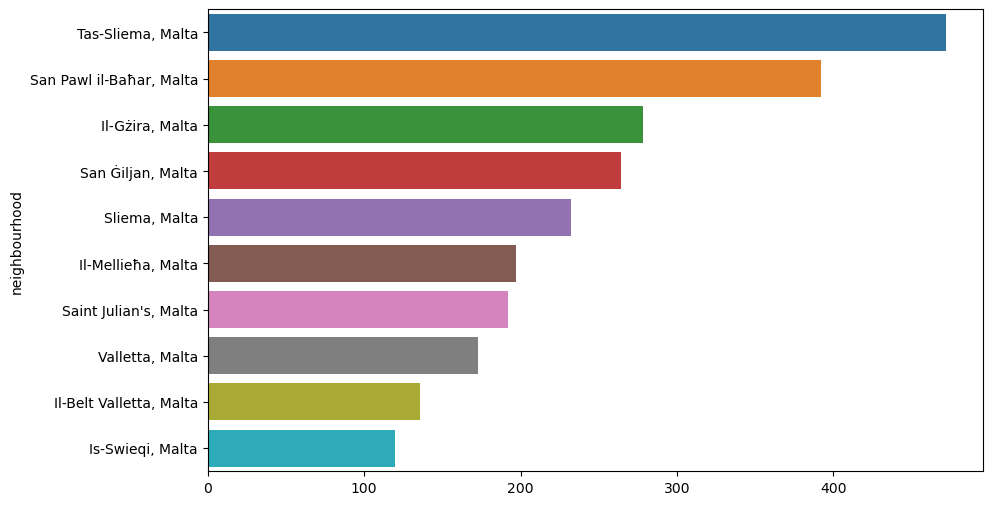

In [60]:
# plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x = listings.groupby('neighbourhood').size().sort_values(ascending=False).values[:10],
            y = listings.groupby('neighbourhood').size().sort_values(ascending=False).index[:10])
# listings.groupby('region_name').size().sort_values().values

<Axes: xlabel='latitude', ylabel='longitude'>

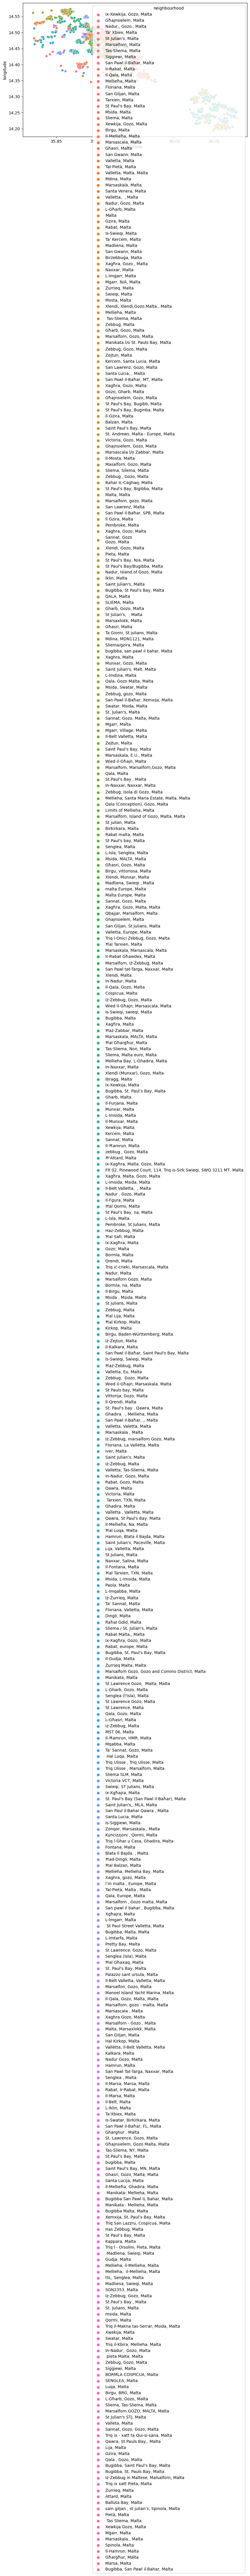

In [79]:
sns.scatterplot(data = listings.loc[:, ['latitude', 'longitude', 'neighbourhood']], x = 'latitude', y = 'longitude', hue = 'neighbourhood')

In [144]:
# for top 10

new_df = listings.merge(listings.groupby('neighbourhood').size().reset_index().rename(columns = {0:'count_of_listings'}),
              on = 'neighbourhood', how = 'left').sort_values(by = 'count_of_listings', ascending=False)
# new_df.isin(new_df.neighbourhood.unique()[:10])['neighbourhood']


new = new_df[new_df.isin(new_df['neighbourhood'].unique()[:10])['neighbourhood']]

<Axes: xlabel='latitude', ylabel='longitude'>

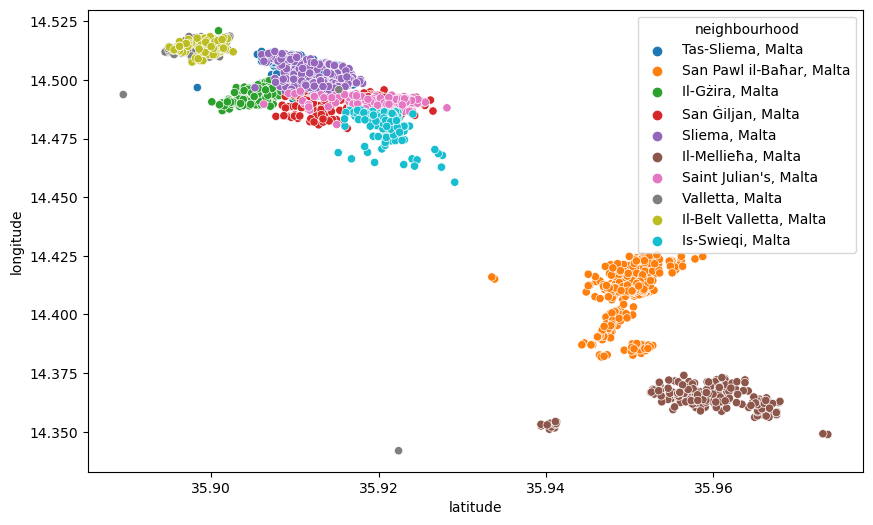

In [145]:
sns.scatterplot(data = new, x = 'latitude', y = 'longitude', hue = 'neighbourhood')

# No. of guest

<Axes: xlabel='accommodates', ylabel='0'>

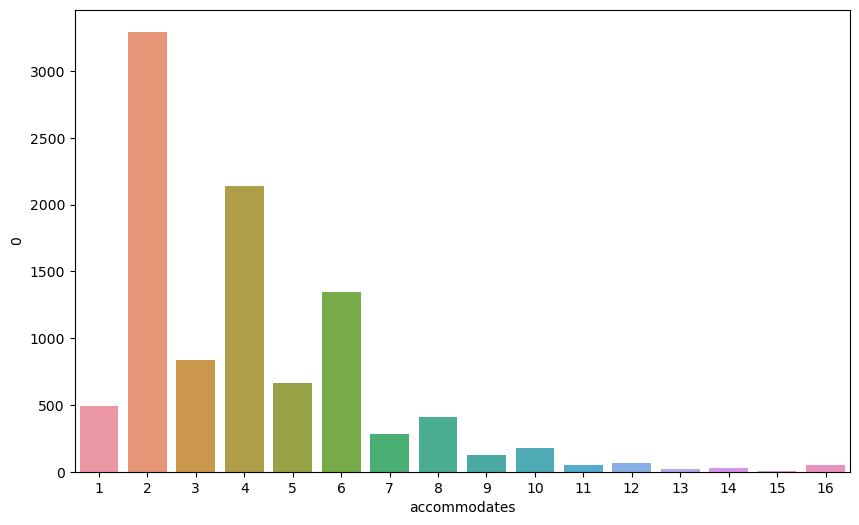

In [180]:
sns.barplot(data = listings.groupby('accommodates').size().reset_index(), x = 'accommodates', y = 0)
# listings.groupby('accommodates').size().reset_index()

# obs: majority of listings can accomodate upto 6 guests, while maximum can accomodate 2 guests

In [182]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9999 non-null   int64  
 1   listing_url                                   9999 non-null   object 
 2   scrape_id                                     9999 non-null   int64  
 3   name                                          9999 non-null   object 
 4   description                                   9888 non-null   object 
 5   neighborhood_overview                         5418 non-null   object 
 6   picture_url                                   9999 non-null   object 
 7   host_id                                       9999 non-null   int64  
 8   host_url                                      9999 non-null   object 
 9   host_name                                     9999 non-null   o

# Price variance around different locations

In [183]:
listings['price']

0       $150.00
1       $104.00
2        $50.00
3        $58.00
4        $60.00
         ...   
9994     $60.00
9995    $105.00
9996     $60.00
9997    $125.00
9998     $60.00
Name: price, Length: 9999, dtype: object

In [210]:
import re

listings['price'] = listings['price'].map(lambda i: float(re.sub('[^\d.]', '', i)))

In [214]:
listings['price'].describe()

count      9999.000000
mean        136.593859
std        1011.645228
min           7.000000
25%          62.000000
50%          93.000000
75%         146.000000
max      100000.000000
Name: price, dtype: float64

<Axes: xlabel='latitude', ylabel='longitude'>

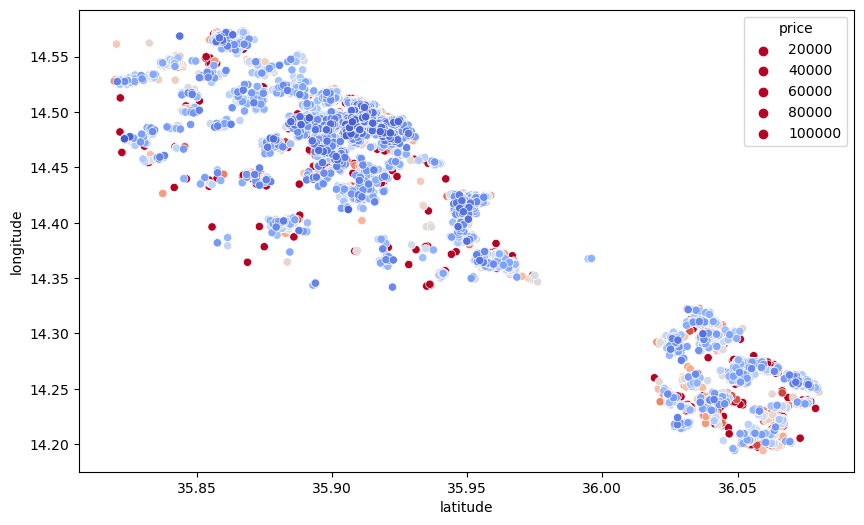

In [225]:
sns.scatterplot(data = listings.sort_values(by = 'price', ascending=False), hue = 'price', hue_norm = (0,200),
                x = 'latitude', y = 'longitude', palette='coolwarm')

In [270]:
# this data contains the pricing of the listings with date, as they vary with time. We can convert the prices 
# to zscores with wrt their listing

std = len(data_calender.loc[:, ['listing_id', 'price']].groupby('listing_id').transform('std')['price'].unique())
mean = data_calender.loc[:, ['listing_id', 'price']].groupby('listing_id').mean()['price']

# data_calender.loc[:, ['listing_id', 'price']]

,price
listing_id,
50188,167.868493
102120,138.000000
109123,45.178082
113998,49.320548
114044,56.257534
...,...
981052644241873573,60.000000
981082568292770946,105.041096
981392323738493738,60.000000


In [230]:
data_calender['price'] = data_calender['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
data_calender['adjusted_price'] = data_calender['adjusted_price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [271]:
# lets first observe how the price is being varied
# it's not possible to observe each and every listing, so instead we can just use mean of for every date, although that way,
# listings with higher pricing will have more control over the trend line

In [286]:
# so we can instead use min max norm for each listing
min = data_calender.groupby('listing_id').min()['price'].reset_index().rename(columns = {'price':'min_price'})
max = data_calender.groupby('listing_id').max()['price'].reset_index().rename(columns = {'price':'max_price'})

In [287]:
min.head()

,listing_id,min_price
0,50188,150.0
1,102120,138.0
2,109123,45.0
3,113998,49.0
4,114044,27.0


In [289]:
data_calender = data_calender.merge(min, on = 'listing_id', how = 'left')
data_calender = data_calender.merge(max, on = 'listing_id', how = 'left')

In [292]:
data_calender['min_max_norm'] = (data_calender['price'] - data_calender['min_price']) / (data_calender['max_price'] - data_calender['min_price'])

In [306]:
from datetime import datetime
data_calender['month'] = data_calender['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month)

In [308]:
data_calender.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,min_price,max_price,min_max_norm,month
0,50188,2023-09-18,f,150.0,150.0,4,1125,150.0,196.0,0.0,9
1,50188,2023-09-19,f,150.0,150.0,4,1125,150.0,196.0,0.0,9
2,50188,2023-09-20,f,150.0,150.0,4,1125,150.0,196.0,0.0,9
3,50188,2023-09-21,f,150.0,150.0,4,1125,150.0,196.0,0.0,9
4,50188,2023-09-22,f,150.0,150.0,4,1125,150.0,196.0,0.0,9


<Axes: xlabel='date', ylabel='min_max_norm'>

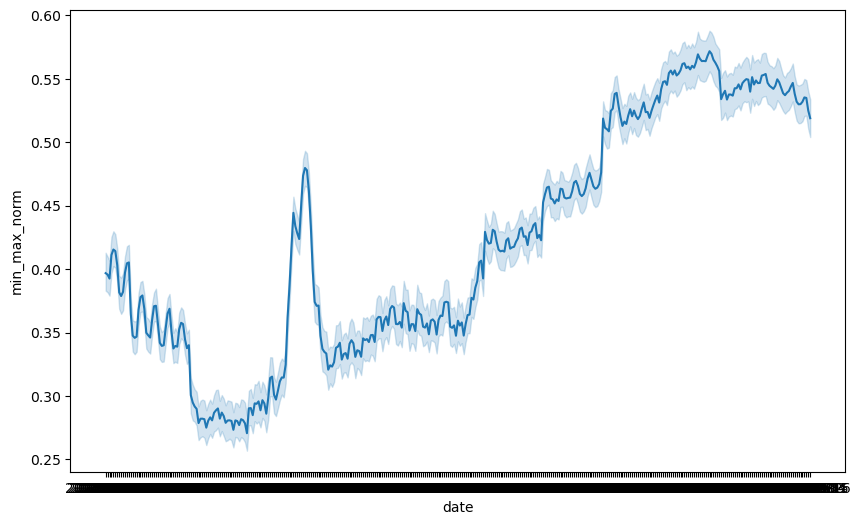

In [298]:
sns.lineplot(data = data_calender.groupby(['date','min_max_norm']).size().reset_index().drop(0, axis = 1),
             x = 'date', y = 'min_max_norm')

<Axes: xlabel='month'>

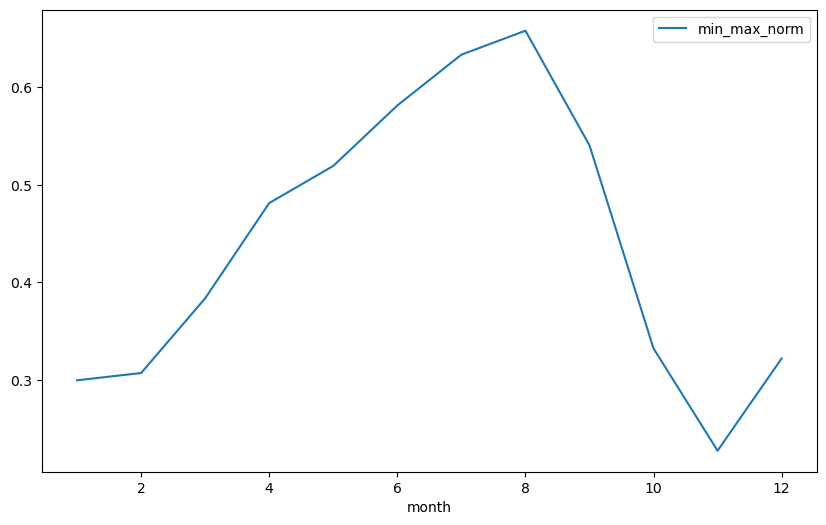

In [318]:
sns.lineplot(data_calender.loc[:, ['month', 'min_max_norm']].groupby(['month']).mean())

In [300]:
data_calender.groupby(['date','min_max_norm']).size().reset_index().drop(0, axis = 1)

,date,min_max_norm
0,2023-09-18,0.000000
1,2023-09-18,0.000505
2,2023-09-18,0.002217
3,2023-09-18,0.002286
4,2023-09-18,0.003046
...,...,...
436057,2024-09-16,0.990000
436058,2024-09-16,0.993289
436059,2024-09-16,0.994350
436060,2024-09-16,0.996503


# Prediction of Prices

In [351]:
data_listings

,id,last_searched,name,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month
0,50188,2023-09-17,Villa in Ix-Xewkija · ★4.88 · 3 bedrooms · 3 b...,45357098,Alexandra,2015-09-29,"Naxxar, Malta",NaN,NaN,NaN,...,1,0,0,MT02664,Xewkija,NaN,NaN,NaN,NaN,1.33
1,102120,2023-09-17,Home in Għajnsielem · ★4.77 · 4 bedrooms · 7 b...,534091,Michael,2011-04-25,Malta,within a few hours,100%,92%,...,7,0,0,MT02622,Ghajnsielem,NaN,NaN,NaN,NaN,0.28
2,109123,2023-09-17,"Rental unit in Nadur, · ★4.80 · 2 bedrooms · 3...",560039,Lino And Rose,2011-05-05,"Nadur, Malta",within a few hours,100%,97%,...,3,0,0,MT02643,Nadur,NaN,NaN,NaN,NaN,0.82
3,113998,2023-09-17,Rental unit in Floriana · ★4.67 · 1 bedroom · ...,578865,Alan,2011-05-11,"Floriana, Malta",within a few hours,100%,93%,...,7,0,0,MT01118,Floriana,NaN,NaN,NaN,NaN,1.36
4,114044,2023-09-17,Condo in Ta' Xbiex · ★4.89 · 1 bedroom · 1 bed...,578994,Paul,2011-05-11,"Ta' Xbiex, Malta",within an hour,100%,100%,...,0,2,0,MT01261,Ta' Xbiex,NaN,NaN,NaN,NaN,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,981052644241873573,2023-09-17,Rental unit in St. Julian's · ★New · 1 bedroom...,389001519,Maria,2021-02-17,"St. Julian's, Malta",within an hour,100%,100%,...,1,1,0,MT01252,San Giljan,NaN,NaN,NaN,NaN,NaN
9995,981082568292770946,2023-09-17,Rental unit in Is-Swieqi · ★New · 2 bedrooms ·...,537263548,Amanda,2023-09-15,NaN,NaN,NaN,100%,...,1,0,0,MT01260,Swieqi,NaN,NaN,NaN,NaN,NaN
9996,981392323738493738,2023-09-17,Rental unit in St. Julian's · ★New · 1 bedroom...,537327763,Sergejs,2023-09-15,NaN,NaN,NaN,NaN,...,0,2,0,MT01252,San Giljan,NaN,NaN,NaN,NaN,NaN
9997,981396676186644060,2023-09-17,Rental unit in Il-Gżira · ★New · 1 bedroom · 1...,65060258,Mandy,2016-03-30,Malta,within a day,100%,100%,...,2,3,0,MT01221,Gzira,NaN,NaN,NaN,NaN,NaN


In [338]:
data_listings.info()

# id, neighbourhood,accommodates,host_location,host_response_time,neighbourhood,latitude, longitude, property_type,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9999 non-null   int64  
 1   listing_url                                   9999 non-null   object 
 2   scrape_id                                     9999 non-null   int64  
 3   last_searched                                 9840 non-null   object 
 4   last_scraped                                  9999 non-null   object 
 5   name                                          9999 non-null   object 
 6   description                                   9888 non-null   object 
 7   neighborhood_overview                         5418 non-null   object 
 8   picture_url                                   9999 non-null   object 
 9   host_id                                       9999 non-null   i

In [347]:
data_listings.drop(['calculated_host_listings_count','instant_bookable', 'license', 'calendar_last_scraped', 'availability_365', 'availability_90', 'availability_60', 'availability_30', 'calendar_updated', 'host_has_profile_pic', 'host_picture_url', 'host_thumbnail_url', 'host_about', 'host_url', 'picture_url', 'neighborhood_overview', 'description', 'last_scraped', 'scrape_id', 'listing_url'], inplace = True, axis = 1)

In [349]:
data_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9999 non-null   int64  
 1   last_searched                                 9840 non-null   object 
 2   name                                          9999 non-null   object 
 3   host_id                                       9999 non-null   int64  
 4   host_name                                     9999 non-null   object 
 5   host_since                                    9999 non-null   object 
 6   host_location                                 6919 non-null   object 
 7   host_response_time                            8885 non-null   object 
 8   host_response_rate                            8885 non-null   object 
 9   host_acceptance_rate                          9346 non-null   o